<a href="https://colab.research.google.com/github/nklsrmy/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-23 15:39:00--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.25, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.2MB/s    in 6.2s    

2025-04-23 15:39:08 (16.2 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
!unzip -q fruits.zip -d fruits_dataset

Import the libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [4]:
base_dir = 'fruits_dataset/fruits'
for split in ['train', 'test', 'validation']:
    os.makedirs(os.path.join(base_dir, split, 'raspberry'), exist_ok=True)

In [5]:
from google.colab import files

print("Uploading raspberry images for TRAIN")
uploaded_train = files.upload()

for filename in uploaded_train:
    with open(os.path.join(base_dir, 'train', 'raspberry', filename), 'wb') as f:
        f.write(uploaded_train[filename])

Uploading raspberry images for TRAIN


Saving 50.jpg to 50.jpg
Saving 49.jpg to 49.jpg
Saving 48.jpg to 48.jpg
Saving 47.jpg to 47.jpg
Saving 46.jpg to 46.jpg
Saving 45.jpg to 45.jpg
Saving 44.jpg to 44.jpg
Saving 43.jpg to 43.jpg
Saving 42.jpg to 42.jpg
Saving 41.jpg to 41.jpg
Saving 40.jpg to 40.jpg
Saving 39.jpg to 39.jpg
Saving 38.jpg to 38.jpg
Saving 37.jpg to 37.jpg
Saving 36.jpg to 36.jpg
Saving 35.jpg to 35.jpg
Saving 34.jpg to 34.jpg
Saving 33.jpg to 33.jpg
Saving 32.jpg to 32.jpg
Saving 31.jpg to 31.jpg
Saving 30.jpg to 30.jpg
Saving 29.jpg to 29.jpg
Saving 28.jpg to 28.jpg
Saving 27.jpg to 27.jpg
Saving 26.jpg to 26.jpg
Saving 25.jpg to 25.jpg
Saving 24.jpg to 24.jpg
Saving 23.jpg to 23.jpg
Saving 22.jpg to 22.jpg
Saving 21.jpg to 21.jpg
Saving 20.jpg to 20.jpg
Saving 19.jpg to 19.jpg
Saving 18.jpg to 18.jpg
Saving 17.jpg to 17.jpg
Saving 16.jpg to 16.jpg
Saving 15.jpg to 15.jpg
Saving 14.jpg to 14.jpg
Saving 13.jpg to 13.jpg
Saving 12.jpg to 12.jpg
Saving 11.jpg to 11.jpg
Saving 10.jpg to 10.jpg
Saving 9.jpg to 

In [6]:
print("Uploading raspberry images for TEST")
uploaded_test = files.upload()

for filename in uploaded_test:
    with open(os.path.join(base_dir, 'test', 'raspberry', filename), 'wb') as f:
        f.write(uploaded_test[filename])

Uploading raspberry images for TEST


Saving 62.jpg to 62.jpg
Saving 75.jpg to 75.jpg
Saving 74.jpg to 74.jpg
Saving 73.jpg to 73.jpg
Saving 72.jpg to 72.jpg
Saving 71.jpg to 71.jpg
Saving 70.jpg to 70.jpg
Saving 69.jpg to 69.jpg
Saving 68.jpg to 68.jpg
Saving 67.jpg to 67.jpg
Saving 66.jpg to 66.jpg
Saving 65.jpg to 65.jpg
Saving 64.jpg to 64.jpg
Saving 63.jpg to 63.jpg
Saving 56.jpg to 56.jpg
Saving 55.jpg to 55.jpg
Saving 54.jpg to 54.jpg
Saving 53.jpg to 53.jpg
Saving 52.jpg to 52.jpg
Saving 51.jpg to 51.jpg
Saving 61.jpg to 61.jpg
Saving 60.jpg to 60.jpg
Saving 59.jpg to 59.jpg
Saving 58.jpg to 58.jpg
Saving 57.jpg to 57.jpg


In [7]:
print("Uploading raspberry images for VALIDATION")
uploaded_val = files.upload()

for filename in uploaded_val:
    with open(os.path.join(base_dir, 'validation', 'raspberry', filename), 'wb') as f:
        f.write(uploaded_val[filename])

Uploading raspberry images for VALIDATION


Saving 100.jpg to 100.jpg
Saving 99.jpg to 99.jpg
Saving 98.jpg to 98.jpg
Saving 97.jpg to 97.jpg
Saving 96.jpg to 96.jpg
Saving 95.jpg to 95.jpg
Saving 94.jpg to 94.jpg
Saving 93.jpg to 93.jpg
Saving 92.jpg to 92.jpg
Saving 91.jpg to 91.jpg
Saving 90.jpg to 90.jpg
Saving 89.jpg to 89.jpg
Saving 88.jpg to 88.jpg
Saving 87.jpg to 87.jpg
Saving 86.jpg to 86.jpg
Saving 85.jpg to 85.jpg
Saving 84.jpg to 84.jpg
Saving 83.jpg to 83.jpg
Saving 82.jpg to 82.jpg
Saving 81.jpg to 81.jpg
Saving 80.jpg to 80.jpg
Saving 79.jpg to 79.jpg
Saving 78.jpg to 78.jpg
Saving 77.jpg to 77.jpg
Saving 76.jpg to 76.jpg


In [8]:
for split in ['train', 'test', 'validation']:
    raspberry_path = os.path.join(base_dir, split, 'raspberry')
    count = len(os.listdir(raspberry_path))
    print(f"{split.upper()} - Raspberry images: {count}")

TRAIN - Raspberry images: 50
TEST - Raspberry images: 25
VALIDATION - Raspberry images: 25


Hyperparameters: Set the image size and batch size

In [9]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits_dataset/fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits_dataset/fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits_dataset/fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 510 files belonging to 4 classes.
Found 91 files belonging to 4 classes.
Found 155 files belonging to 4 classes.


Display sample images from the dataset

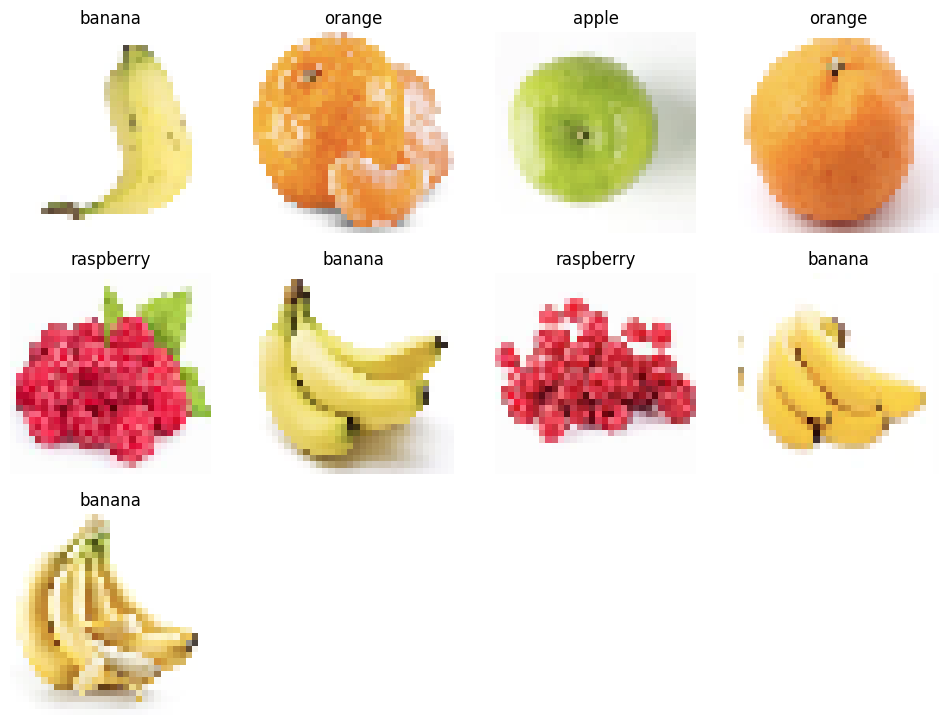

In [13]:
class_names = ["apple", "banana", "orange", "raspberry"]
plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)),

    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4)
])

Define the optimizer and loss function

In [16]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,412 (1.10 MB)

 Trainable params: 289,412 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

In [26]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 25
)

Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9891 - loss: 0.0470 - val_accuracy: 0.9341 - val_loss: 0.2392
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9994 - loss: 0.0093 - val_accuracy: 0.9560 - val_loss: 0.2237
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9987 - loss: 0.0105 - val_accuracy: 0.9560 - val_loss: 0.2010
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9990 - loss: 0.0076 - val_accuracy: 0.9451 - val_loss: 0.2144
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9833 - loss: 0.0729 - val_accuracy: 0.9121 - val_loss: 0.3324
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9911 - loss: 0.0272 - val_accuracy: 0.9341 - val_loss: 0.2537
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9560 - val_loss: 0.2163
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9560 - v

Test the model

In [27]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9787 - loss: 0.0708


[0.08255241811275482, 0.9741935729980469]

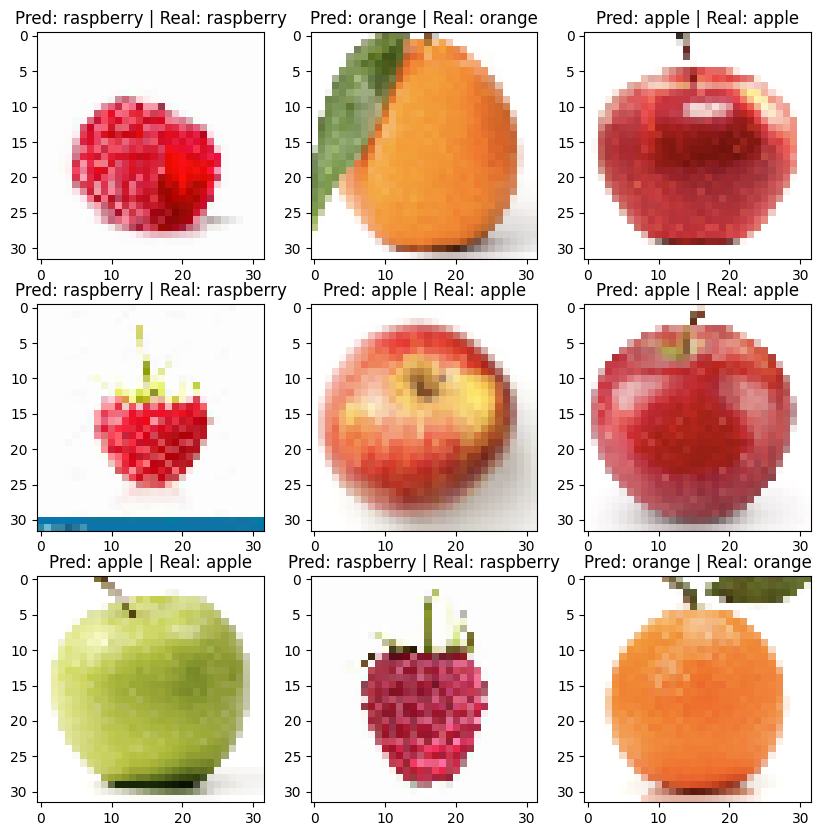

In [28]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp_h8x1o5z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139752197851280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197852240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197849168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197860880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197853200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197863184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197862224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197863952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197863376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139752197864720: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [30]:
model.save('fruitmodel.keras')